In [53]:
# learn the (V,I) -> C relationship
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os
%matplotlib inline
st = time.time()

# data is assumed to be [V_vec I_vec C_vec]
# number of input_param is variable and is determined by the code


# change the file name if using a different system
data = np.loadtxt(os.path.expanduser('~/quantum-ml/data/var_K_I_V.txt'))

# data randomly permuted to improve learning rate
data = np.random.permutation(data)
n_tot = data.shape[0]
n_train = int(0.8*n_tot)
n_test = n_tot - n_train

# input parameters
n_inp = 2*int(data.shape[1]/3)
n_out = int(data.shape[1]/3)
print("Number of inputs:", n_inp)
print("Number of outputs:", n_out)

x_train_data = data[:n_train,:n_inp].reshape((n_train,n_inp))
y_train_data = data[:n_train,n_inp:].reshape((n_train,n_out))/5.0

x_test_data = data[n_train:,:n_inp].reshape((n_test,n_inp))
y_test_data = data[n_train:,n_inp:].reshape((n_test,n_out))/5.0                 


print("Total, Training, Test")
print(n_tot, n_train, n_test)

x = tf.placeholder(tf.float32,[None,n_inp])

W = tf.Variable(tf.zeros([n_inp,n_out]))
b = tf.Variable(tf.zeros([n_out]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32,[None,n_out])
loss = tf.reduce_mean(tf.square(y_ - y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

N_train = 100000
for _ in range(N_train):
    if (_ % (N_train/10) == 0):
        print("Shh. The Machine is Learning! : ",int(_ * 100/ N_train),"%")
    (batch_xs, batch_ys) = x_train_data,y_train_data
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print("\nCompleted in",time.time()-st,"seconds.")

print("\nloss")
print(sess.run(loss, feed_dict={x: x_test_data, y_: y_test_data}))

Number of inputs: 200
Number of outputs: 100
Total, Training, Test
100 80 20
Shh. The Machine is Learning! :  0 %
Shh. The Machine is Learning! :  10 %
Shh. The Machine is Learning! :  20 %
Shh. The Machine is Learning! :  30 %
Shh. The Machine is Learning! :  40 %
Shh. The Machine is Learning! :  50 %
Shh. The Machine is Learning! :  60 %
Shh. The Machine is Learning! :  70 %
Shh. The Machine is Learning! :  80 %
Shh. The Machine is Learning! :  90 %

Completed in 170.1993589401245 seconds.

loss
0.180817


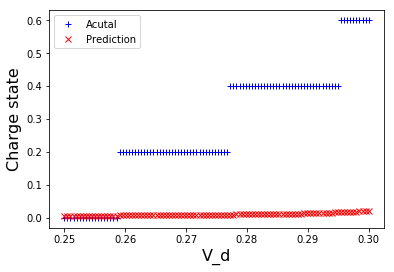

In [55]:
z = y
z_corr = y_
output_model = sess.run([z,z_corr],{x:x_test_data,y_: y_test_data})

#print(output_model)
plt.plot(x_test_data[4,:n_out],output_model[1][4],'b+')
plt.plot(x_test_data[4,:n_out],output_model[0][4],'rx')
plt.legend(['Acutal','Prediction'])
plt.xlabel('V_d',fontsize=16)
plt.ylabel('Charge state',fontsize=16)

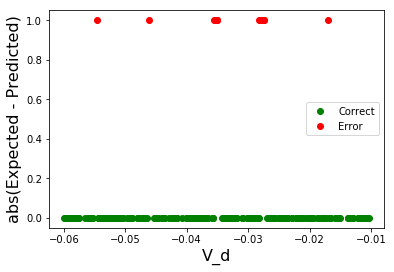

In [4]:
diff = np.abs(output_model[0]-output_model[1])
corr = [i for i, ele in enumerate(diff) if ele == 0]
err = [i for i, ele in enumerate(diff) if ele > 0]
plt.plot(x_test_data[corr,0],diff[corr],'go')
plt.plot(x_test_data[err,0],diff[err],'ro')
plt.xlabel('V_d',fontsize=16)
plt.ylabel('abs(Expected - Predicted)',fontsize=16)
plt.legend(['Correct','Error'])